# Computer Network: Network Simulation using NS2
> __Morteza Nouri, 810198481__ <br>
> __Seyed Mohammad Amin Atyabi, 810198559__

## Goals
- Creating network topology and simulating it with NS2
- Getting familiar with different layers of network (e.g, UDP, TCP, etc.)
- Getting familiar with wireless networks especially 802.11 (WiFi)
- Measuring performance metrics of networks
- Impact of Error rate on Throughput, Packet Transfer Ratio and End-to-End delay

## Description:
> __Network Topology:__<br>


## Results:



In [5]:
import os
import random
import matplotlib.pyplot as plt
from Analyzer import Analyzer

TCL = 'WLan.tcl'

### Scenario 1:
- generating 10 different error rates between 0.000001 and 0.00001 and detecting impact of that on performance other performance metrics

In [ ]:
# Default args
BANDWIDTH = '1Mb'
PACKETSIZE = '1024'

# Scenario 1: give 10 different error rates between 0.000001 and 0.00001 and detect impact on performance parameters
err_rates = []
for i in range(10):
    err_rates.append(random.uniform(0.00001, 0.000001))
    
err_rates.sort()
throughput = []
transfer_ratio = []
avg_delay = []
for err_rate in err_rates:
    prog = TCL + ' ' + BANDWIDTH + ' ' + PACKETSIZE + ' ' + str(err_rate)
    command = 'ns' + ' ' + prog
    os.system(command)
    analyzer = Analyzer('traces/' + BANDWIDTH + '-' + PACKETSIZE + '-' + str(err_rate) + '.tr')
    analyzer.parse()
    throughput.append(analyzer.throughput())
    transfer_ratio.append(analyzer.packet_transfer_ratio())
    avg_delay.append(analyzer.avg_end_to_end_delay())

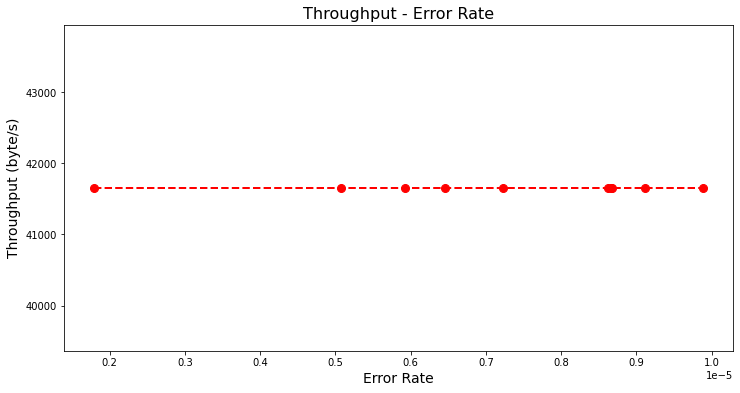

In [7]:
plt.rcParams["figure.figsize"] = (12, 6) 

plt.plot(err_rates, throughput, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Throughput (byte/s)', fontsize=14)
plt.title('Throughput - Error Rate', fontsize=16)
plt.savefig("Throughput-ErrorRate")

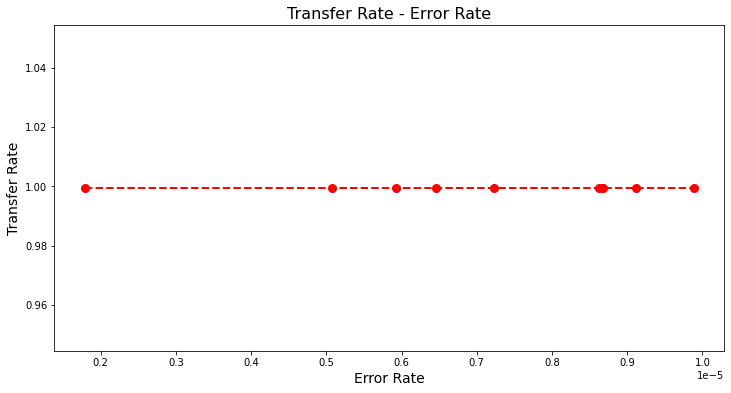

In [8]:
plt.plot(err_rates, transfer_ratio, color='red', linestyle='dashed',
         linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Transfer Rate', fontsize=14)
plt.title('Transfer Rate - Error Rate', fontsize=16)
plt.savefig("TransferRate-ErrorRate")

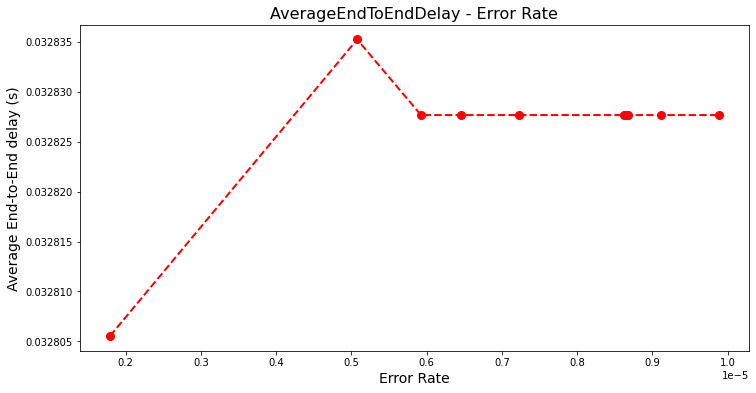

In [9]:
plt.plot(err_rates, avg_delay, color='red', linestyle='dashed',
         linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Average End-to-End delay (s)', fontsize=14)
plt.title('AverageEndToEndDelay - Error Rate', fontsize=16)
plt.savefig("AverageEndToEndDelay-ErrorRate")